**Importing the Dependencies**

In [1]:
import zipfile
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**data collection**

In [2]:
# Set Kaggle API credentials
os.environ["KAGGLE_USERNAME"] = "himanshuvishwa0070"
os.environ["KAGGLE_KEY"] = "e23b004166236f4a5787539d80db6220"

# Download the dataset
! kaggle datasets download -d fmendes/fmendesdat263xdemos

fmendesdat263xdemos.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Path to the ZIP file
zip_file_path = 'fmendesdat263xdemos.zip'

# Names of the CSV files inside the ZIP archive
csv_file_name_1 = 'calories.csv'
csv_file_name_2 = 'exercise.csv'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Open and read the first CSV file
    with z.open(csv_file_name_1) as f1:
        df1 = pd.read_csv(f1)
    
    # Open and read the second CSV file
    with z.open(csv_file_name_2) as f2:
        df2 = pd.read_csv(f2)

# Display the first few rows of each DataFrame
print("First DataFrame:")
print(df1.head())
print("\nSecond DataFrame:")
print(df2.head())

First DataFrame:
    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

Second DataFrame:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8


In [4]:
print(df1.shape)
print(df2.shape)

(15000, 2)
(15000, 8)


**Combining the two Dataframes**

In [5]:
calories_df = pd.merge(df1, df2, on='User_ID', how='inner')

In [6]:
calories_df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
# checking the number of rows and columns
calories_df.shape

(15000, 9)

In [8]:
# getting some imformation about the data
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
# checking for missing velues
calories_df.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

**Data Analysis of the data**

In [10]:
# get some statistical mesure about the data
calories_df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


**Data Visulization**

In [11]:
sns.set()

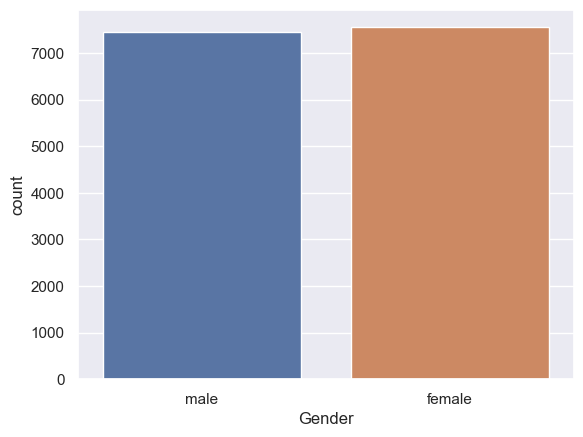

In [12]:
# plotting the gender column in  count plot
sns.countplot(x='Gender', data=calories_df)

# Show the plot
plt.show()

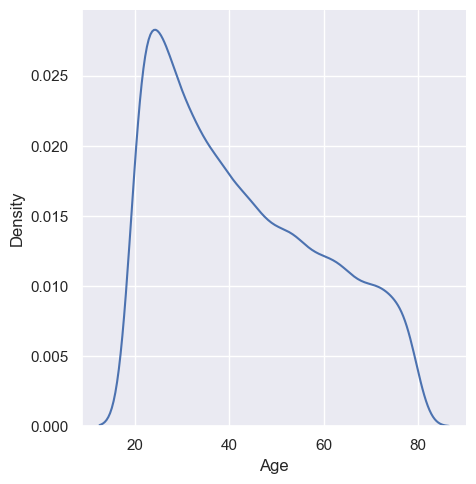

In [13]:
# finding the distribution of "age" of data
sns.displot(data=calories_df, x='Age', kind='kde')

# Show the plot
plt.show()

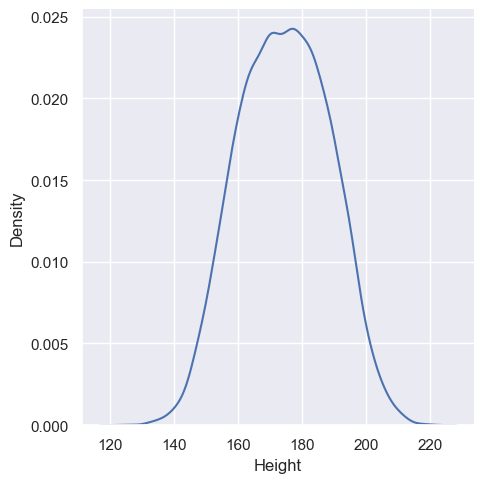

In [14]:
sns.displot(data=calories_df, x='Height', kind='kde')
# Show the plot
plt.show()

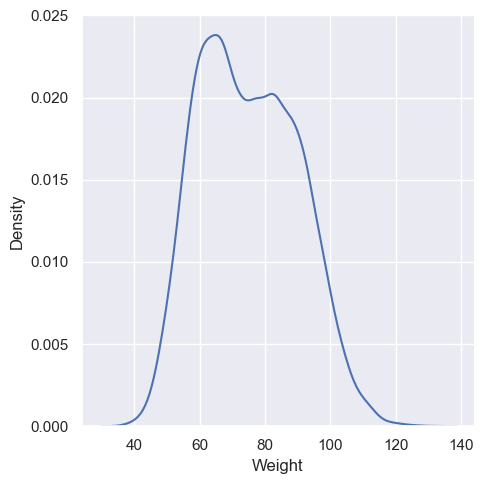

In [15]:
sns.displot(data=calories_df, x='Weight', kind='kde')
# Show the plot
plt.show()

**Finding the Correlation in the dataset**   

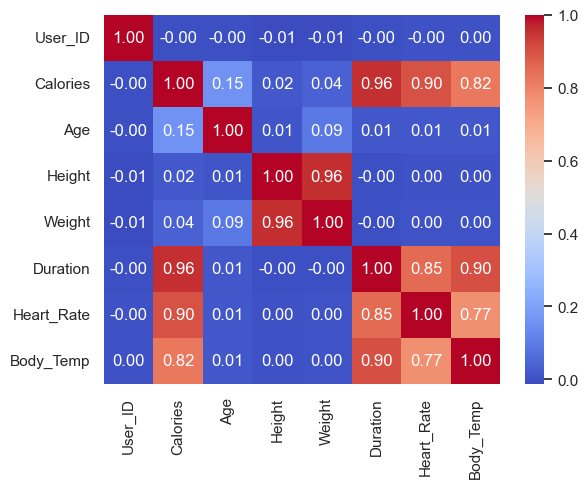

In [16]:
# Select only the numeric columns
numeric_df = calories_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()


In [17]:
numeric_df.head()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,27,154.0,58.0,10.0,81.0,39.8


In [18]:
calories_df.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [19]:
calories_df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8


**Selecting the best suited features**

In [20]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

**Separating features and Target**

In [21]:
X = calories_df.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_df['Calories']

In [22]:
kbest = SelectKBest(mutual_info_regression, k=4)
kbest.fit(X,Y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000001B55AEFFC40>)

In [23]:
X.columns[kbest.get_support()]

Index(['Age', 'Duration', 'Heart_Rate', 'Body_Temp'], dtype='object')

In [24]:
X = X[X.columns[kbest.get_support()]]


In [25]:
print(X)

       Age  Duration  Heart_Rate  Body_Temp
0       68      29.0       105.0       40.8
1       20      14.0        94.0       40.3
2       69       5.0        88.0       38.7
3       34      13.0       100.0       40.5
4       27      10.0        81.0       39.8
...    ...       ...         ...        ...
14995   20      11.0        92.0       40.4
14996   27       6.0        85.0       39.2
14997   43      16.0        90.0       40.1
14998   78       2.0        84.0       38.3
14999   63      18.0        92.0       40.5

[15000 rows x 4 columns]


**Splitting the data into training data and Test data**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 4) (12000, 4) (3000, 4)


**Model Training**

**XGBoost Regressor**

In [28]:
# loading the model
model = XGBRegressor()

In [29]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluation**

Prediction on Test Data

In [30]:
test_data_prediction = model.predict(X_test)

In [31]:
print(test_data_prediction)

[132.2932   214.37624   38.98912  ... 148.99855   23.533289  95.497574]


In [32]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [33]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  5.15152959783872


In [34]:
# traning anothoer models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
# Creating a function for finding the accuracy for various models
def model_performance(model):
    model.fit(X_train, Y_train)
    ans = model.predict(X_test)
    print(f"rmse:{np.sqrt(mean_squared_error(Y_test,ans))}")
    print(f"mae:{mean_absolute_error(Y_test,ans)}")

In [36]:
# Accuracy for Linear Regression
model_performance(LinearRegression())

rmse:11.522991363056395
mae:8.390469036848891


In [37]:
# Accuracy for Random Forest Regressor
model_performance(RandomForestRegressor())

rmse:7.713694859574998
mae:5.122415866762867


In [38]:
# Accuracy for Support Vector Regressor 
model_performance(SVR())

rmse:9.61883222411228
mae:5.855952350174191


In [39]:
# Accuracy for XGBoost Regressor
model_performance(XGBRegressor())

rmse:7.8041513178867055
mae:5.15152959783872


In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
regressor = RandomForestRegressor()
param_grid = {
    'n_estimators':[20,400,1000],
    'max_features':["auto","sqrt"],
    'max_depth':[10,40,70],
    'min_samples_leaf':[1,2,4]
}

In [42]:
randomized = RandomizedSearchCV(estimator=regressor, param_distributions=param_grid, scoring="neg_mean_squared_error", cv=5, verbose=2, random_state=42)

In [43]:
randomized.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\hjha8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, n_estimators=400; total time=   9.4s


c:\Users\hjha8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, n_estimators=400; total time=   8.4s


c:\Users\hjha8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, n_estimators=400; total time=   8.6s


c:\Users\hjha8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, n_estimators=400; total time=   8.8s


c:\Users\hjha8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, n_estimators=400; total time=   8.9s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, n_estimators=400; total time=   4.3s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, n_estimators=400; total time=   5.1s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, n_estimators=400; total time=   3.8s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, n_estimators=400; total time=   5.1s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, n_estimators=400; total time=   4.5s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, n_estimators=20; total time=   0.1s
[CV] END max_d

c:\Users\hjha8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=4, n_estimators=1000; total time=62.9min


c:\Users\hjha8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=4, n_estimators=1000; total time=  15.5s


c:\Users\hjha8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=4, n_estimators=1000; total time=  12.3s


c:\Users\hjha8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
randomized.best_params_

{'n_estimators': 400,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 70}

**Fitting our best model**

In [ ]:
best_model = randomized.best_estimator_

In [ ]:
model_performance(best_model)

rmse:7.416590910600052
mae:4.963028548892392
